# Conférences Python Master TIDE #2

## A) US baby names

Télécharger le dataset national des prénoms US :
- Site : https://www.ssa.gov/oact/babynames/limits.html
- Fichier : https://www.ssa.gov/oact/babynames/names.zip

**Data Preparation**
- Avec une boucle et en utilisant la fonction `concat()` de **pandas** constituer un DataFrame avec l'ensemble des fichiers en ajoutant une colonne avec l'année.
- Ordre et noms des colonnes du DataFrame créé : "year", "name", "gender", "births"

**Data Analysis**
- Quel est le top 16 de la fréquence des prénoms dans le fichier ? Expliquer.
- Calculer la fréquence des genres dans le fichier. Expliquer.
- Ecrire une fonction qui affiche l'évolution des naissances d'un prénom et d'un genre dans le temps.
- Calculer l'évolution du nombre de naissances par année et par genre et afficher un graphique.
- Calculer l'évolution de la diversité des prénoms par année et par genre et afficher un graphique.

**Data Viz**
- Quels sont les 10 prénoms qui ont été les plus donnés.
- Produire un graphique de type `stripplot` avec en x les naissances, en y les 10 prénoms les plus donnés et une couleur différente par nuages de points.

## B) Prénoms français

Télécharger le dataset Fichiers France hors Mayotte de l'INSEE :
- https://www.insee.fr/fr/statistiques/8595130
- https://www.insee.fr/fr/statistiques/fichier/8595130/prenoms-2024-nat_csv.zip

L'idée est de charger les données et ensuite de les conformer au DataFrame des prénoms US. Ainsi, toute manipulation sur le DataFrame des prénoms US pourra être directement réutilisée avec le DataFrame des prénoms français.

**Data Preparation**
- Charger les données dans un DataFrame.
- Utiliser les mêmes noms de colonnes que pour le DataFrame US.
- Eliminer les données inutilisables et les prénoms d'une seule lettre.
- Passer les prénoms en minuscules sauf les initiales qui doivent rester en majuscules. Attention aux prénoms composés.
- Utiliser les mêmes catégories pour le genre.
- Passer les nombres de naissances en entiers.
- Trier le DataFrame à l'identique : années croissantes, genres croissants, naissances décroissantes, prénoms croissants.
- Remettre un index allant de 0 à N-1.

**Data Analysis**
- Ecrire une fonction qui affiche l'évolution des naissances d'un prénom dans le temps.
- Calculer l'évolution du nombre de naissances par année et par genre et afficher un graphique.
- Calculer l'évolution de la diversité des prénoms par année et par genre et afficher un graphique.

## C) Villes du monde et pays

Télécharger le dataset avec les villes du monde de plus de 500 habitants :
- http://www.geonames.org/
- http://download.geonames.org/export/dump/cities500.zip


**Data Preparation**
- Dans un premier temps, charger les données dans un DataFrame avec comme noms de colonnes <code>['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']</code>
- On obtient un warning sur des types mixtes : parmi les colonnes qui sont des chaînes de caractères, quelles sont celles qui comportent également des nombres ? (appliquer la méthode de chaîne `isdigit()` sur les colonnes de type `object`).
- Compter le nombre de valeurs manquantes dans chaque colonne : quelle colonnes ne devraient pas avoir de valeurs manquantes ?
- Appliquer `describe()` sur le DataFrame complet, quelle valeur semble être également une valeur manquante ?
- Recharger les données en passant en `str` les colonnes mixtes et en précisant les valeurs manquantes.

**Split-apply-combine strategy**
- Ecrire une fonction qui trouve le nombre de `alternatenames` de chaque ville.
```python
def average_alternate_names(group):
    pass
```
- Calculer la moyenne du nombre de `alternatenames` par `feature code`.

**Jointure**

- Charger le tableau de la page https://www.geonames.org/countries/ avec la fonction **pandas** <code>read_html</code> en prenant garde aux valeurs manquantes par défaut.
- Joindre le DataFrame des villes avec celui des pays.
- Ecrire une fonction qui retourne le nom de la ville la plus peuplée et la tester sur le DataFrame obtenu.
- Appliquer la fonction en groupant par continent.

&copy; Francis Wolinski 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

os.listdir("data/names")

In [ ]:
import glob

glob.glob("data/names/*.txt")

In [3]:
dfs = []

for year in range(1880, 2025):
    filename = f"data/names/yob{year}.txt"
    # print(filename)
    csv = pd.read_csv(filename, header=None, names=["name", "gender", "births"])
    csv["year"] = year
    dfs.append(csv)

df = pd.concat(dfs, ignore_index=True)

df = df [["year", "name", "gender", "births"]]

df

,year,name,gender,births
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2149472,2024,Zylyn,M,5
2149473,2024,Zymiere,M,5
2149474,2024,Zypher,M,5
2149475,2024,Zyre,M,5


In [29]:
df["name"].nunique()

104819

In [13]:
df["name"].value_counts().head(16)

name
James      290
Johnnie    290
Ollie      290
Sidney     290
Lee        290
William    290
Marion     290
Tommie     290
Jesse      290
Francis    290
Jean       290
Leslie     290
Jessie     290
John       290
June       289
Charlie    289
Name: count, dtype: int64

In [14]:
df["gender"].value_counts()

gender
F    1263426
M     886051
Name: count, dtype: int64

In [24]:
def trace_prenom(name, gender):
    selection = df.loc[(df["name"] == name) & (df["gender"] == gender)]
    fig, ax = plt.subplots()
    ax.plot(selection["year"], selection["births"])

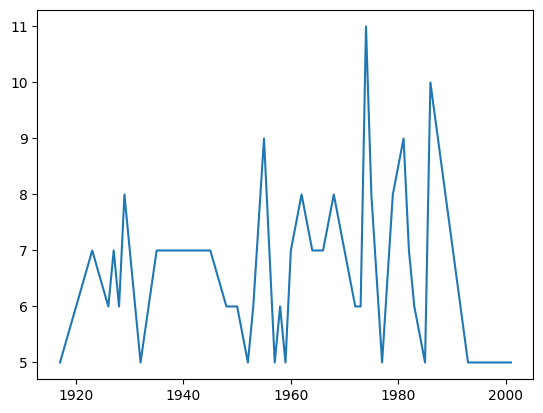

In [28]:
trace_prenom("Juline", "F")

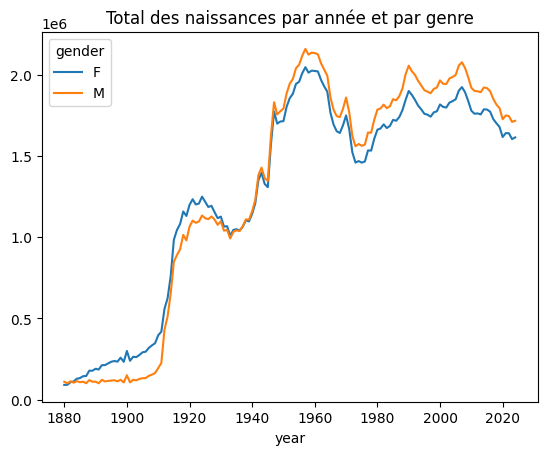

In [33]:
df.pivot_table(index="year",
               columns="gender",
               values="births",
               aggfunc="sum").plot(title="Total des naissances par année et par genre");

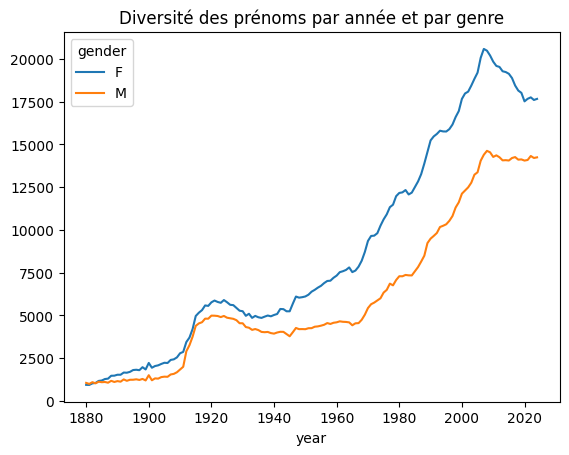

In [39]:
df.pivot_table(index="year",
               columns="gender",
               values="name",
               aggfunc="count").plot(title="Diversité des prénoms par année et par genre");

In [49]:
prenoms_top10 = df.pivot_table(index="name",
               values="births",
               aggfunc="sum").nlargest(10, "births").index.tolist()
prenoms_top10

['James',
 'John',
 'Robert',
 'Michael',
 'William',
 'Mary',
 'David',
 'Joseph',
 'Richard',
 'Charles']

In [51]:
df_top10 = df.loc[df["name"].isin(prenoms_top10)]
df_top10

,year,name,gender,births
0,1880,Mary,F,7065
228,1880,John,F,46
286,1880,William,F,30
343,1880,James,F,22
514,1880,Robert,F,12
...,...,...,...,...
2135264,2024,David,M,7317
2135265,2024,Joseph,M,7223
2135284,2024,Charles,M,5593
2135323,2024,Robert,M,3785


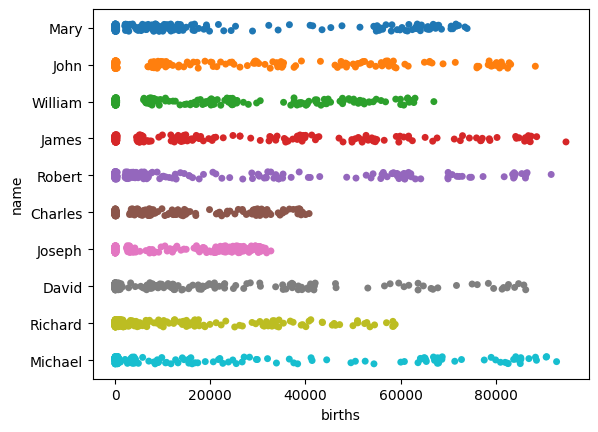

In [53]:
sns.stripplot(data=df_top10, x="births", y="name", hue="name", legend=False);

In [57]:
df.loc[df["births"].idxmax()]

year       1947
name      Linda
gender        F
births    99693
Name: 431068, dtype: object

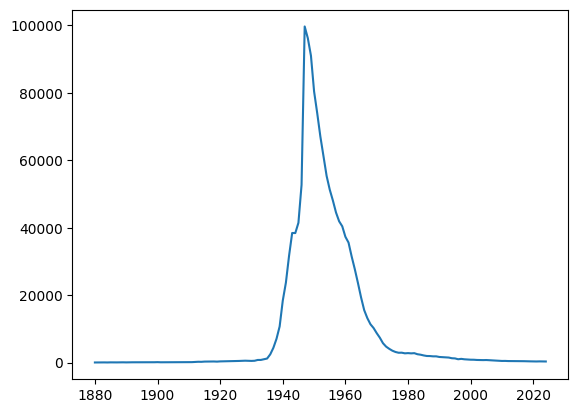

In [58]:
trace_prenom("Linda", "F")

In [59]:
df.nlargest(10, "births")

,year,name,gender,births
431068,1947,Linda,F,99693
441439,1948,Linda,F,96216
437172,1947,James,M,94763
544684,1957,Michael,M,92786
437173,1947,Robert,M,91654
451678,1949,Linda,F,91016
533215,1956,Michael,M,90691
556269,1958,Michael,M,90598
447479,1948,James,M,88604
510830,1954,Michael,M,88564


In [4]:
df

,year,name,gender,births
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2149472,2024,Zylyn,M,5
2149473,2024,Zymiere,M,5
2149474,2024,Zypher,M,5
2149475,2024,Zyre,M,5


In [5]:
!ls data

correspondance-code-insee-code-postal.csv
couverture-2g-3g-4g-en-france-par-operateur-juillet-2015.csv
ListeOF.zip
names
names.zip
prenoms-2024-nat_csv.zip
Webstat_Export.csv


In [15]:
"ÉMILIE-ROSE".title()

'Émilie-Rose'

In [22]:
df.loc[df["name"].str.contains("-", na=False)]

,year,name,gender,births
274,1951,Ab-Del,M,5
275,1952,Ab-Del,M,5
276,1961,Ab-Del,M,5
277,1967,Ab-Del,M,5
278,1969,Ab-Del,M,5
...,...,...,...,...
704084,1974,Yves-Lise,F,5
706123,2001,Zehra-Nur,F,5
709052,2020,Zélie-Rose,F,5
709053,2022,Zélie-Rose,F,5


In [29]:
df = pd.read_csv("./data/prenoms-2024-nat_csv.zip",
                 sep=";",
                 header=0,
                 names=["gender", "name", "year", "births"],
                 na_values="",
                 keep_default_na=False,
                )

df = df [["year", "name", "gender", "births"]]

df["name"] = df["name"].str.title()

df["gender"] = df["gender"].map({1:"M", 2:"F"})

df = df.sort_values(by=["year", "gender", "births", "name"], ascending=[True, True, False, True])

df = df.reset_index(drop=True)

df

,year,name,gender,births
0,1900,Marie,F,48715
1,1900,Jeanne,F,13980
2,1900,Marguerite,F,8060
3,1900,Germaine,F,6980
4,1900,Louise,F,6695
...,...,...,...,...
711064,2024,Ézra,M,5
711065,2024,Ézyo,M,5
711066,2024,Ézéquiel,M,5
711067,2024,Îmran,M,5


In [30]:
df.isna().any()

year      False
name      False
gender    False
births    False
dtype: bool

In [31]:
df.loc[df.isna().any(axis=1)]

,year,name,gender,births


In [20]:
df["name"].unique()

array(['Aaban', 'Aadam', 'Aadarsh', ..., 'Özge', 'Özlem', 'Ümmü'],
      shape=(48517,), dtype=object)

In [32]:
def trace_prenom(name, gender):
    selection = df.loc[(df["name"] == name) & (df["gender"] == gender)]
    fig, ax = plt.subplots()
    ax.plot(selection["year"], selection["births"])

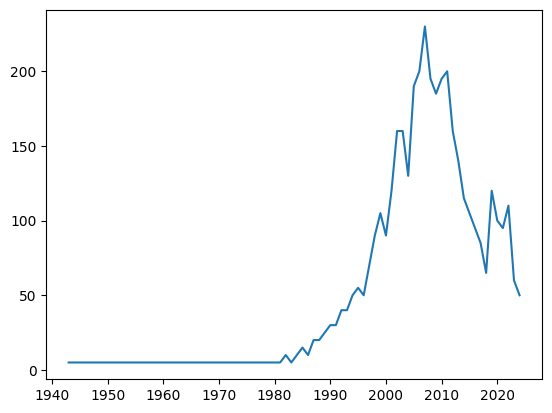

In [33]:
trace_prenom("Juline", "F")

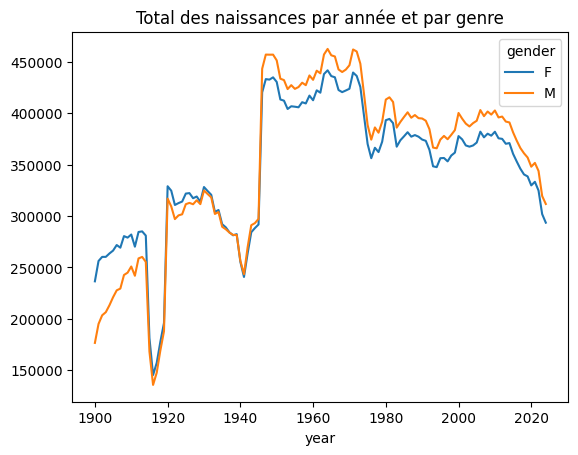

In [34]:
df.pivot_table(index="year",
               columns="gender",
               values="births",
               aggfunc="sum").plot(title="Total des naissances par année et par genre");

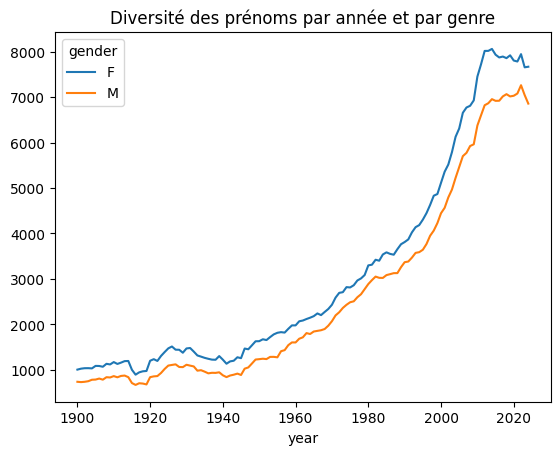

In [35]:
df.pivot_table(index="year",
               columns="gender",
               values="name",
               aggfunc="count").plot(title="Diversité des prénoms par année et par genre");

In [36]:
df.nlargest(10, "births")

,year,name,gender,births
97244,1946,Jean,M,53385
1736,1901,Marie,F,52150
3486,1902,Marie,F,51855
99717,1947,Jean,M,51190
5253,1903,Marie,F,50425
7034,1904,Marie,F,50130
8842,1905,Marie,F,48980
0,1900,Marie,F,48715
10709,1906,Marie,F,48445
14442,1908,Marie,F,47460


In [50]:
df = pd.read_csv("./data/cities500.zip",
                 sep="\t",
                 header=None,
                 names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date'],
                 dtype={12: str, 13: str},
                 na_values=["", -9999],
                 keep_default_na=False,
                )
                
df.head()

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,3038832,Vila,Vila,"Casas Vila,Vila",42.53176,1.56654,P,PPL,AD,NaN,03,NaN,NaN,NaN,1418,NaN,1318.0,Europe/Andorra,2024-11-04
1,3038999,Soldeu,Soldeu,"Sol'deu,Soldeu,surudeu,swldw,Сольдеу,סולדאו,سو...",42.57688,1.66769,P,PPL,AD,NaN,02,NaN,NaN,NaN,602,NaN,1832.0,Europe/Andorra,2017-11-06
2,3039077,Sispony,Sispony,Sispony,42.53368,1.51613,P,PPL,AD,NaN,04,NaN,NaN,NaN,833,NaN,1315.0,Europe/Andorra,2024-11-04
3,3039154,El Tarter,El Tarter,"Ehl Tarter,El Tarter,El Tarter - Principau d'A...",42.57952,1.65362,P,PPL,AD,NaN,02,NaN,NaN,NaN,1052,NaN,1721.0,Europe/Andorra,2012-11-03
4,3039163,Sant Julià de Lòria,Sant Julia de Loria,"San Julia,San Julià,Sant Julia de Loria,Sant J...",42.46372,1.49129,P,PPLA,AD,NaN,06,NaN,NaN,NaN,8022,NaN,921.0,Europe/Andorra,2013-11-23


In [51]:
df.isna().sum()

geonameid                 0
name                      0
asciiname                 0
alternatenames        41276
latitude                  0
longitude                 0
feature class             0
feature code              0
country code              0
cc2                  224689
admin1 code              98
admin2 code           22105
admin3 code          119403
admin4 code          191599
population                0
elevation            190600
dem                     380
timezone                  1
modification date         0
dtype: int64

In [52]:
df.describe()

,geonameid,latitude,longitude,population,elevation,dem
count,2.247920e+05,224792.000000,224792.000000,2.247920e+05,34192.000000,224412.000000
mean,3.776808e+06,30.242370,11.422511,1.899894e+04,299.824725,402.769968
std,2.842062e+06,22.778842,71.259586,1.974491e+05,387.801202,592.664158
min,1.200000e+01,-54.933550,-179.118380,0.000000e+00,-60.000000,-380.000000
25%,1.916448e+06,18.385965,-35.353960,6.400000e+02,65.000000,53.000000
50%,3.019636e+06,39.168635,10.300000,1.689000e+03,200.000000,187.000000
75%,4.530869e+06,47.136580,44.445250,6.542000e+03,349.000000,458.000000
max,1.353556e+07,78.223340,179.364510,2.487450e+07,4402.000000,5622.000000


In [55]:
df["alternatenames"].str.count(",") + 1

0          2.0
1          8.0
2          1.0
3          8.0
4         10.0
          ... 
224787     2.0
224788     1.0
224789    10.0
224790     NaN
224791     NaN
Name: alternatenames, Length: 224792, dtype: float64

In [56]:
def average_alternate_names(group):
    return (group["alternatenames"].str.count(",") + 1).mean()

In [57]:
average_alternate_names(df)

np.float64(5.654340765927767)

In [59]:
df["feature code"].value_counts()

feature code
PPL      131908
PPLA3     29388
PPLA4     27155
PPLA2     23123
PPLX       8734
PPLA       3463
PPLL        561
PPLC        241
STLMT        47
PPLF         39
PPLQ         38
PPLS         31
PPLA5        30
PPLH         15
PPLG          8
PPLW          6
PPLR          4
PPLCH         1
Name: count, dtype: int64

In [64]:
df.groupby("feature code")[["alternatenames"]].apply(average_alternate_names).sort_values(ascending=False)

feature code
PPLC     50.734440
PPLG     35.000000
PPLA     18.413063
STLMT     7.891304
PPLA2     7.394283
PPLW      6.600000
PPL       5.237528
PPLS      5.222222
PPLA4     5.173600
PPLQ      4.833333
PPLA3     4.581142
PPLH      4.100000
PPLX      3.098941
PPLA5     2.800000
PPLL      2.688474
PPLR      2.666667
PPLF      2.312500
PPLCH     2.000000
dtype: float64

In [74]:
df.loc[(df["name"]=="Paris")&(df["country code"]=="FR"), "alternatenames"].iloc[0].split(",")

['Baariis',
 'Bahliz',
 'Baris',
 'Lungsod ng Paris',
 'Lutece',
 'Lutetia',
 'Lutetia Parisorum',
 'Lutèce',
 'PAR',
 'Pa-ri',
 'Paarys',
 'Palika',
 'Paname',
 'Pantruche',
 'Paraeis',
 'Paras',
 'Pari',
 'Paries',
 'Parigge',
 'Pariggi',
 'Parighji',
 'Parigi',
 'Pariis',
 'Pariisi',
 'Pariizu',
 'Pariižu',
 'Parij',
 'Parijs',
 'Paris',
 'Parisi',
 'Parixe',
 'Pariz',
 'Parize',
 'Parizh',
 'Parizh osh',
 "Parizh'",
 'Parizo',
 'Parizs',
 'Pariž',
 'Parys',
 'Paryz',
 'Paryzh',
 'Paryzius',
 'Paryż',
 'Paryžius',
 'Paräis',
 'París',
 'Paríž',
 'Parîs',
 'Parĩ',
 'Parī',
 'Parīze',
 'Paříž',
 'Páras',
 'Párizs',
 'Pʻariz',
 'Ville-Lumiere',
 'Ville-Lumière',
 'ba li',
 'barys',
 'pairisa',
 'pali',
 'pari',
 'paris',
 'parys',
 'paryzh',
 'perisa',
 'pryz',
 'pyaris',
 'pyarisa',
 'pyrs',
 'Παρίσι',
 'Париж',
 'Париж ош',
 'Парижь',
 'Париз',
 'Парис',
 'Парыж',
 'Паріж',
 'Փարիզ',
 'פאריז',
 'פריז',
 'باريس',
 'پارىژ',
 'پاريس',
 'پاریس',
 'پیرس',
 'ܦܐܪܝܣ',
 'पॅरिस',
 'पेरिस',
 'प

In [78]:
df.loc[df["alternatenames"].str.count(",").idxmax(), "alternatenames"].split(",")

['Aelia Capitolina',
 'Al Quds',
 'Al-Kuds',
 'Al-Qudis',
 'Al-Quds',
 'Al-Qudıs',
 'Ariel',
 'Baitul Maqdis',
 'Baitulmuqaddis',
 'Bajtul Makudis',
 'Bayt al-Maqdis',
 'Bayt al-Muqaddas',
 'Cherusalem',
 'City of David',
 'Colonia Aelia Capitolina',
 'Djeruzalem',
 'El Kuds',
 'El Quds esh Sherif',
 'Erusagem',
 'Erusalim',
 'Geruesalem',
 'Gerusalem',
 'Gerusalemme',
 'Gerüsalem',
 'Gierusalemme',
 'Girusalemmi',
 'Herusale',
 'Herusalem',
 'Herusalẽ',
 'Hierosolyma',
 'Hierousalem',
 'Hierousalēm',
 'Hierusalem',
 'Hiruharama',
 'IJerusalem',
 'Ia-lo-sak-leng',
 'Ia-lo-sat-leng',
 'Iarusaileim',
 'Iarúsailéim',
 'Iebous',
 'Iebus',
 'Ierosolyma',
 'Ierousalem',
 'Ierousalimu',
 'Ierusalem',
 'Ierusalema',
 'Ierusalim',
 'Ir David',
 'Ir Ha-Qdoosha',
 'Ir Ha-Qodesh',
 'Iyerusalim',
 'Ià-lô-sák-lēng',
 'Iâ-lō͘-sat-léng',
 'Iýerusalim',
 'JRS',
 'Jarusalen',
 'Jeriwsalem',
 'Jerozale',
 'Jerozalė',
 'Jerozolema',
 'Jerozolima',
 'Jerozolëma',
 'Jerusalem',
 'Jerusalemi',
 'Jerusalemo',

In [81]:
var = pd.read_html("https://www.geonames.org/countries/", na_values="", keep_default_na=False)
[x.shape for x in var]

[(1, 2), (250, 9)]

In [82]:
countries = var[1]

countries

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NA
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NA
...,...,...,...,...,...,...,...,...,...
245,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS
246,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF


In [88]:
df = pd.merge(df, countries, left_on="country code", right_on="ISO-3166 alpha2", how="left")

In [86]:
def top_city(group):
    return group.at[group["population"].idxmax(), "name"]

top_city(df)

'Shanghai'

In [90]:
df.groupby("Continent")[["population", "name"]].apply(top_city)

Continent
AF             Kinshasa
AN    Port-aux-Français
AS             Shanghai
EU               Moscow
NA          Mexico City
OC               Sydney
SA            São Paulo
dtype: object

In [91]:
df.groupby("Country")[["population", "name"]].apply(top_city)

Country
Afghanistan                  Kabul
Albania                     Tirana
Algeria                    Algiers
American Samoa           Pago Pago
Andorra           Andorra la Vella
                        ...       
Western Sahara            Laayoune
Yemen                        Sanaa
Zambia                      Lusaka
Zimbabwe                    Harare
Åland                    Mariehamn
Length: 246, dtype: object